# Lab I: Playground


### Importing Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading Image

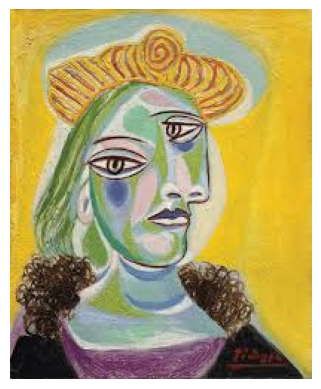

In [5]:
img = cv2.imread("image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### Exercise - I: Playing with an Image

#### Flipping an Image (horizontally and vertically)

In [6]:
flipped = cv2.flip(img_rgb, 1)

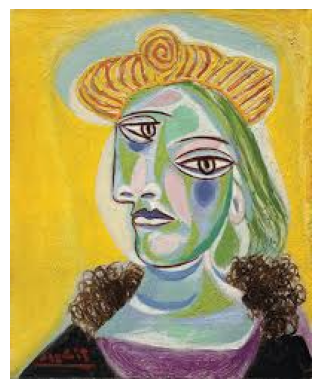

In [7]:
plt.imshow(flipped)
plt.axis('off')
plt.show()

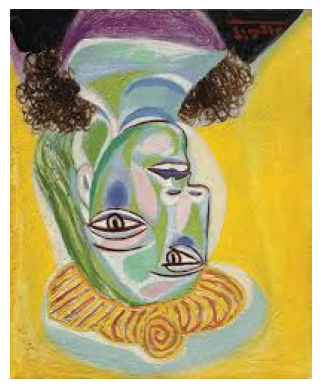

In [8]:
flipped_2 = cv2.flip(img_rgb, 0)

plt.imshow(flipped_2)
plt.axis('off')
plt.show()

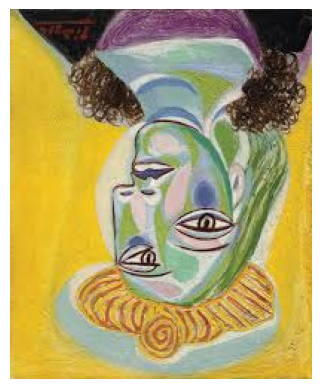

In [9]:
flipped_3 = cv2.flip(img_rgb, -1)

plt.imshow(flipped_3)
plt.axis('off')
plt.show()

Inference -
- flipcode = 0 -> horizontal flip
- flipcode = 1 -> vertical flip
- flipcode = -1 -> both

#### Cropping an Image

In [10]:
h, w = img.shape[:2]

y1, y2 = 50, 200
x1, x2 = 30, 180

crop = img[y1:y2, x1:x2]

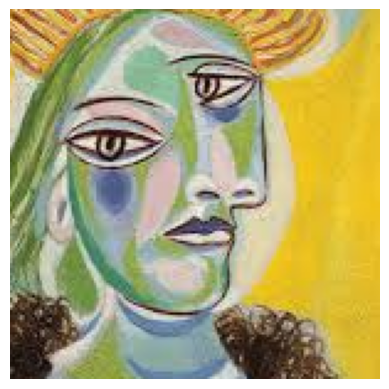

In [11]:
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Inference -

Image operations are essentially matrix transformations that alter intensity distribution and spatial arrangement.

#### Plotting Histogram

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


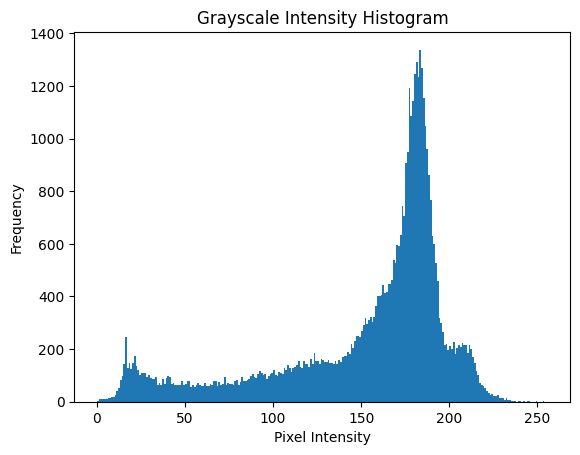

In [13]:
plt.figure()
plt.hist(gray.ravel(), bins=256, range=(0, 256))
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Grayscale Intensity Histogram")
plt.show()


ravel() - flattens your image into a 1-D array. It does not change the pixel values—only how they are laid out in memory.

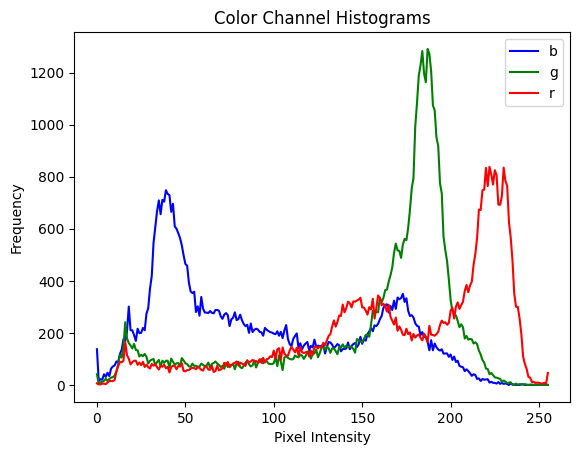

In [15]:
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c, label=c)

plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Color Channel Histograms")
plt.legend()
plt.show()


### Exercise II - Adding Noise and Blur to the Image

#### Exercise 2A: Making an image noisy

In [16]:
noise = np.random.normal(0, 25, gray.shape)
noisy = np.clip(gray + noise, 0, 255).astype(np.uint8)

In [17]:
noise

array([[-29.56983728,  -2.40302088, -10.6034979 , ...,   5.03730781,
         -3.61856924,   7.9988239 ],
       [ 21.19264947,  13.67648857, -26.11398221, ..., -26.88482756,
          1.38243182,   3.53502821],
       [-30.17677501,  73.48485639, -18.37923914, ...,   6.35347549,
        -46.25668217, -33.42334484],
       ...,
       [  8.27875243, -32.32429669,  -5.43348124, ..., -27.40747643,
        -16.82537047,   1.53395004],
       [-46.60068132,  -7.97931961,  -9.45189834, ..., -12.21675286,
         14.52450751,   3.06687369],
       [ -0.15546064,  30.33056216,  51.92743947, ..., -17.27024429,
         22.50814943,  42.81221612]])

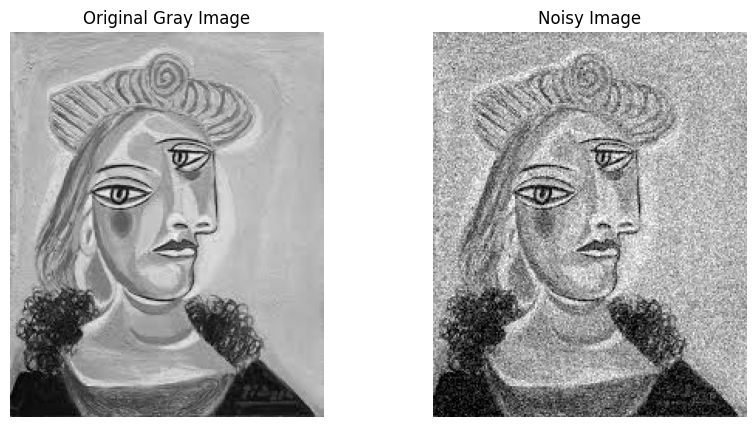

In [18]:
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.show()

Inference -

- Creates a mask of random values that follows a Normal (Gaussian) Distribution.
  - '0' is the mean and '25' is the standard deviation.
  - We ensure that the noise matrix is is the exact same height and width as the input image.
- We add the noisy values to each pixel in the image and then use a clip function to keep the new pixel values between 0 and 255.

#### Exercise 2B: Adding Blur to an image

#### Method #1 - Box Blur

In [19]:
box_blur = cv2.blur(gray, (7, 7))

#### Method #2 Gaussian Blur

In [20]:
gaussian_blur = cv2.GaussianBlur(gray, (7, 7), 0)

#### Method #3 Median Blur

In [21]:
median_blur = cv2.medianBlur(gray, 7)

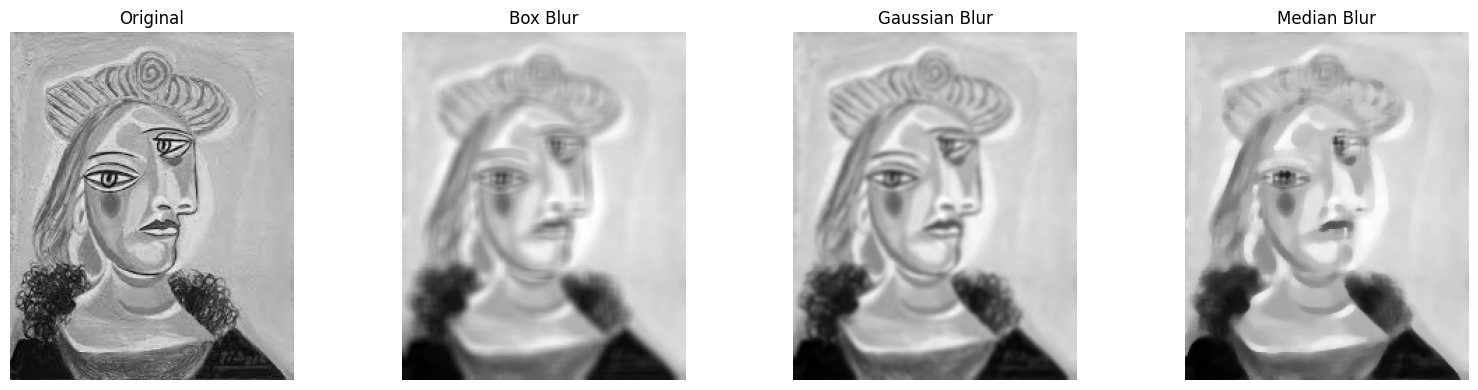

In [22]:
titles = ['Original', 'Box Blur', 'Gaussian Blur', 'Median Blur']
images = [gray, box_blur, gaussian_blur, median_blur]

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Mathematical operation for blur (convolution)

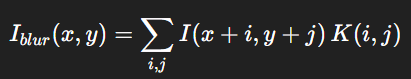

I = original image

K = kernel (the blur’s personality)

Inference -
- **Box blur** looks the blurriest due to every pixel in the 7 x 7 grid becoming the *average* of its neighbors (1/49). Leads to edge bleeding.
- **Gaussian blur** is the smarter blurring technique where it takes a weighted average where *close* pixels matter more. Smooth, and preserves edges better.
- **Median blur** replaces pixel with the median of the neighborhood. However, this is non-linear and no convolution takes place. Preserves edges well and *extremes* are considered outliers.